In [1]:
import csv
import collections
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from scipy.spatial import cKDTree as KDTree

In [2]:
#------------------------------------------------------------------------------
class GeocodeData:

    def __init__(self):
        coordinates, self.locations = self.extract()
        self.tree = KDTree(coordinates)
        self.load_countries()
  

    def load_countries(self):
        """Load a map of country code to name
        """
        self.countries = {}
        for code, name in csv.reader(open('./countries.csv')):
            self.countries[code] = name


    def query(self, coordinates):
        """Find closest match to this list of coordinates
        """
        try:
            distances, indices = self.tree.query(coordinates, k=1)
        except ValueError as e:
            print('Unable to parse coordinates: {}'.format(coordinates))
            raise e
        else:
            results = [self.locations[index] for index in indices]
            for result in results:
                result['country'] = self.countries.get(result['country_code'], '')
            return results


    def extract(self):
        """Extract geocode data 
        """

        rows = pd.read_csv('./geocode.csv')

        # load a list of known coordinates and corresponding locations
        coordinates, locations = [], []        
        
        for index, row in rows.iterrows():
            coordinates.append((row['Latitude'], row['Longitude']))
            locations.append(dict(country_code=row['CountryCode'], city=row['City']))
        return coordinates, locations
        
#------------------------------------------------------------------------------

In [5]:
def earthquakeFileRead():
    """Extract earthquakeFile data 
    """

    rows = pd.read_csv("earthquakes-23k.csv")

    # load a list of known coordinates and corresponding locations
    coordinates = []        
    dates = []
    magnitude = []
    
    for index, row in rows.iterrows():
        coordinates.append((row['Latitude'], row['Longitude']))
        dates.append(row['Date'])
        magnitude.append(row['Magnitude'])
        
    return coordinates, dates, magnitude        

  
def get(coordinate):
    """Search for closest known location to this coordinate
    """
    gd = GeocodeData()
    return gd.query([coordinate])[0]

def search(coordinates):
    """Search for closest known locations to these coordinates
    """
    gd = GeocodeData()
    return gd.query(coordinates)

In [6]:
lat_long, dates, magnitude = earthquakeFileRead()

# test some coordinate lookups
#city1 = 19.246,145.616

datas = search(lat_long)

#update the earthquake data with dates and magnitude
for uD, dt, mg in zip(datas, dates, magnitude):
    dict1 = {'date':dt, 'magnitude':mg} 
    uD.update(dict1)

print(datas)

[{'country_code': 'MP', 'city': 'Saipan', 'country': 'Northern Mariana Islands', 'date': '12/21/2016', 'magnitude': 5.9}, {'country_code': 'ID', 'city': 'Tongutisungi', 'country': 'Indonesia', 'date': '10/09/2016', 'magnitude': 5.8}, {'country_code': 'TO', 'city': 'Pangai', 'country': 'Tonga', 'date': '11/16/2016', 'magnitude': 5.8}, {'country_code': 'GS', 'city': 'Grytviken', 'country': 'South Georgia and the South Sandwich Islands', 'date': '09/22/2016', 'magnitude': 5.5}, {'country_code': 'PH', 'city': 'Dapdap', 'country': 'Philippines', 'date': '04/21/1995', 'magnitude': 6.8}, {'country_code': 'VU', 'city': 'Sola', 'country': 'Vanuatu', 'date': '04/07/2016', 'magnitude': 6.7}, {'country_code': 'IN', 'city': 'Naya Bāzār', 'country': 'India', 'date': '01/12/1965', 'magnitude': 5.9}, {'country_code': 'VU', 'city': 'Sola', 'country': 'Vanuatu', 'date': '04/07/2016', 'magnitude': 6.7}, {'country_code': 'GS', 'city': 'Grytviken', 'country': 'South Georgia and the South Sandwich Islands',

In [7]:
'''
Data for pie graph

CLASS	MAGNITUDE
Great	8 or more
Major	7 - 7.9
Strong	6 - 6.9
Moderate	5 - 5.9
Light	4 - 4.9
Minor	3 -3.9
'''
uniqueDataByMagnitude  = collections.Counter(e['magnitude'] for e in datas)

print(uniqueDataByMagnitude)

Counter({5.5: 5568, 5.6: 5071, 5.8: 2519, 5.9: 2385, 5.7: 2176, 6.0: 1337, 6.1: 1182, 6.7: 600, 6.4: 571, 6.2: 495, 6.3: 411, 6.6: 265, 6.5: 246, 6.8: 220, 6.9: 87, 7.0: 79, 7.2: 50, 7.3: 37, 7.1: 32, 7.5: 14, 5.52: 12, 7.6: 12, 7.7: 8, 7.4: 7, 5.69: 4, 5.77: 3, 7.9: 2, 8.0: 2, 5.66: 2, 5.51: 2, 5.58: 2, 5.75: 2, 6.35: 1, 5.67: 1, 7.8: 1, 5.89: 1, 8.2: 1, 5.94: 1, 5.97: 1, 5.72: 1, 6.02: 1})


Text(0.5, 1, 'Eartquakes From 1965 - 2016 by Classes')

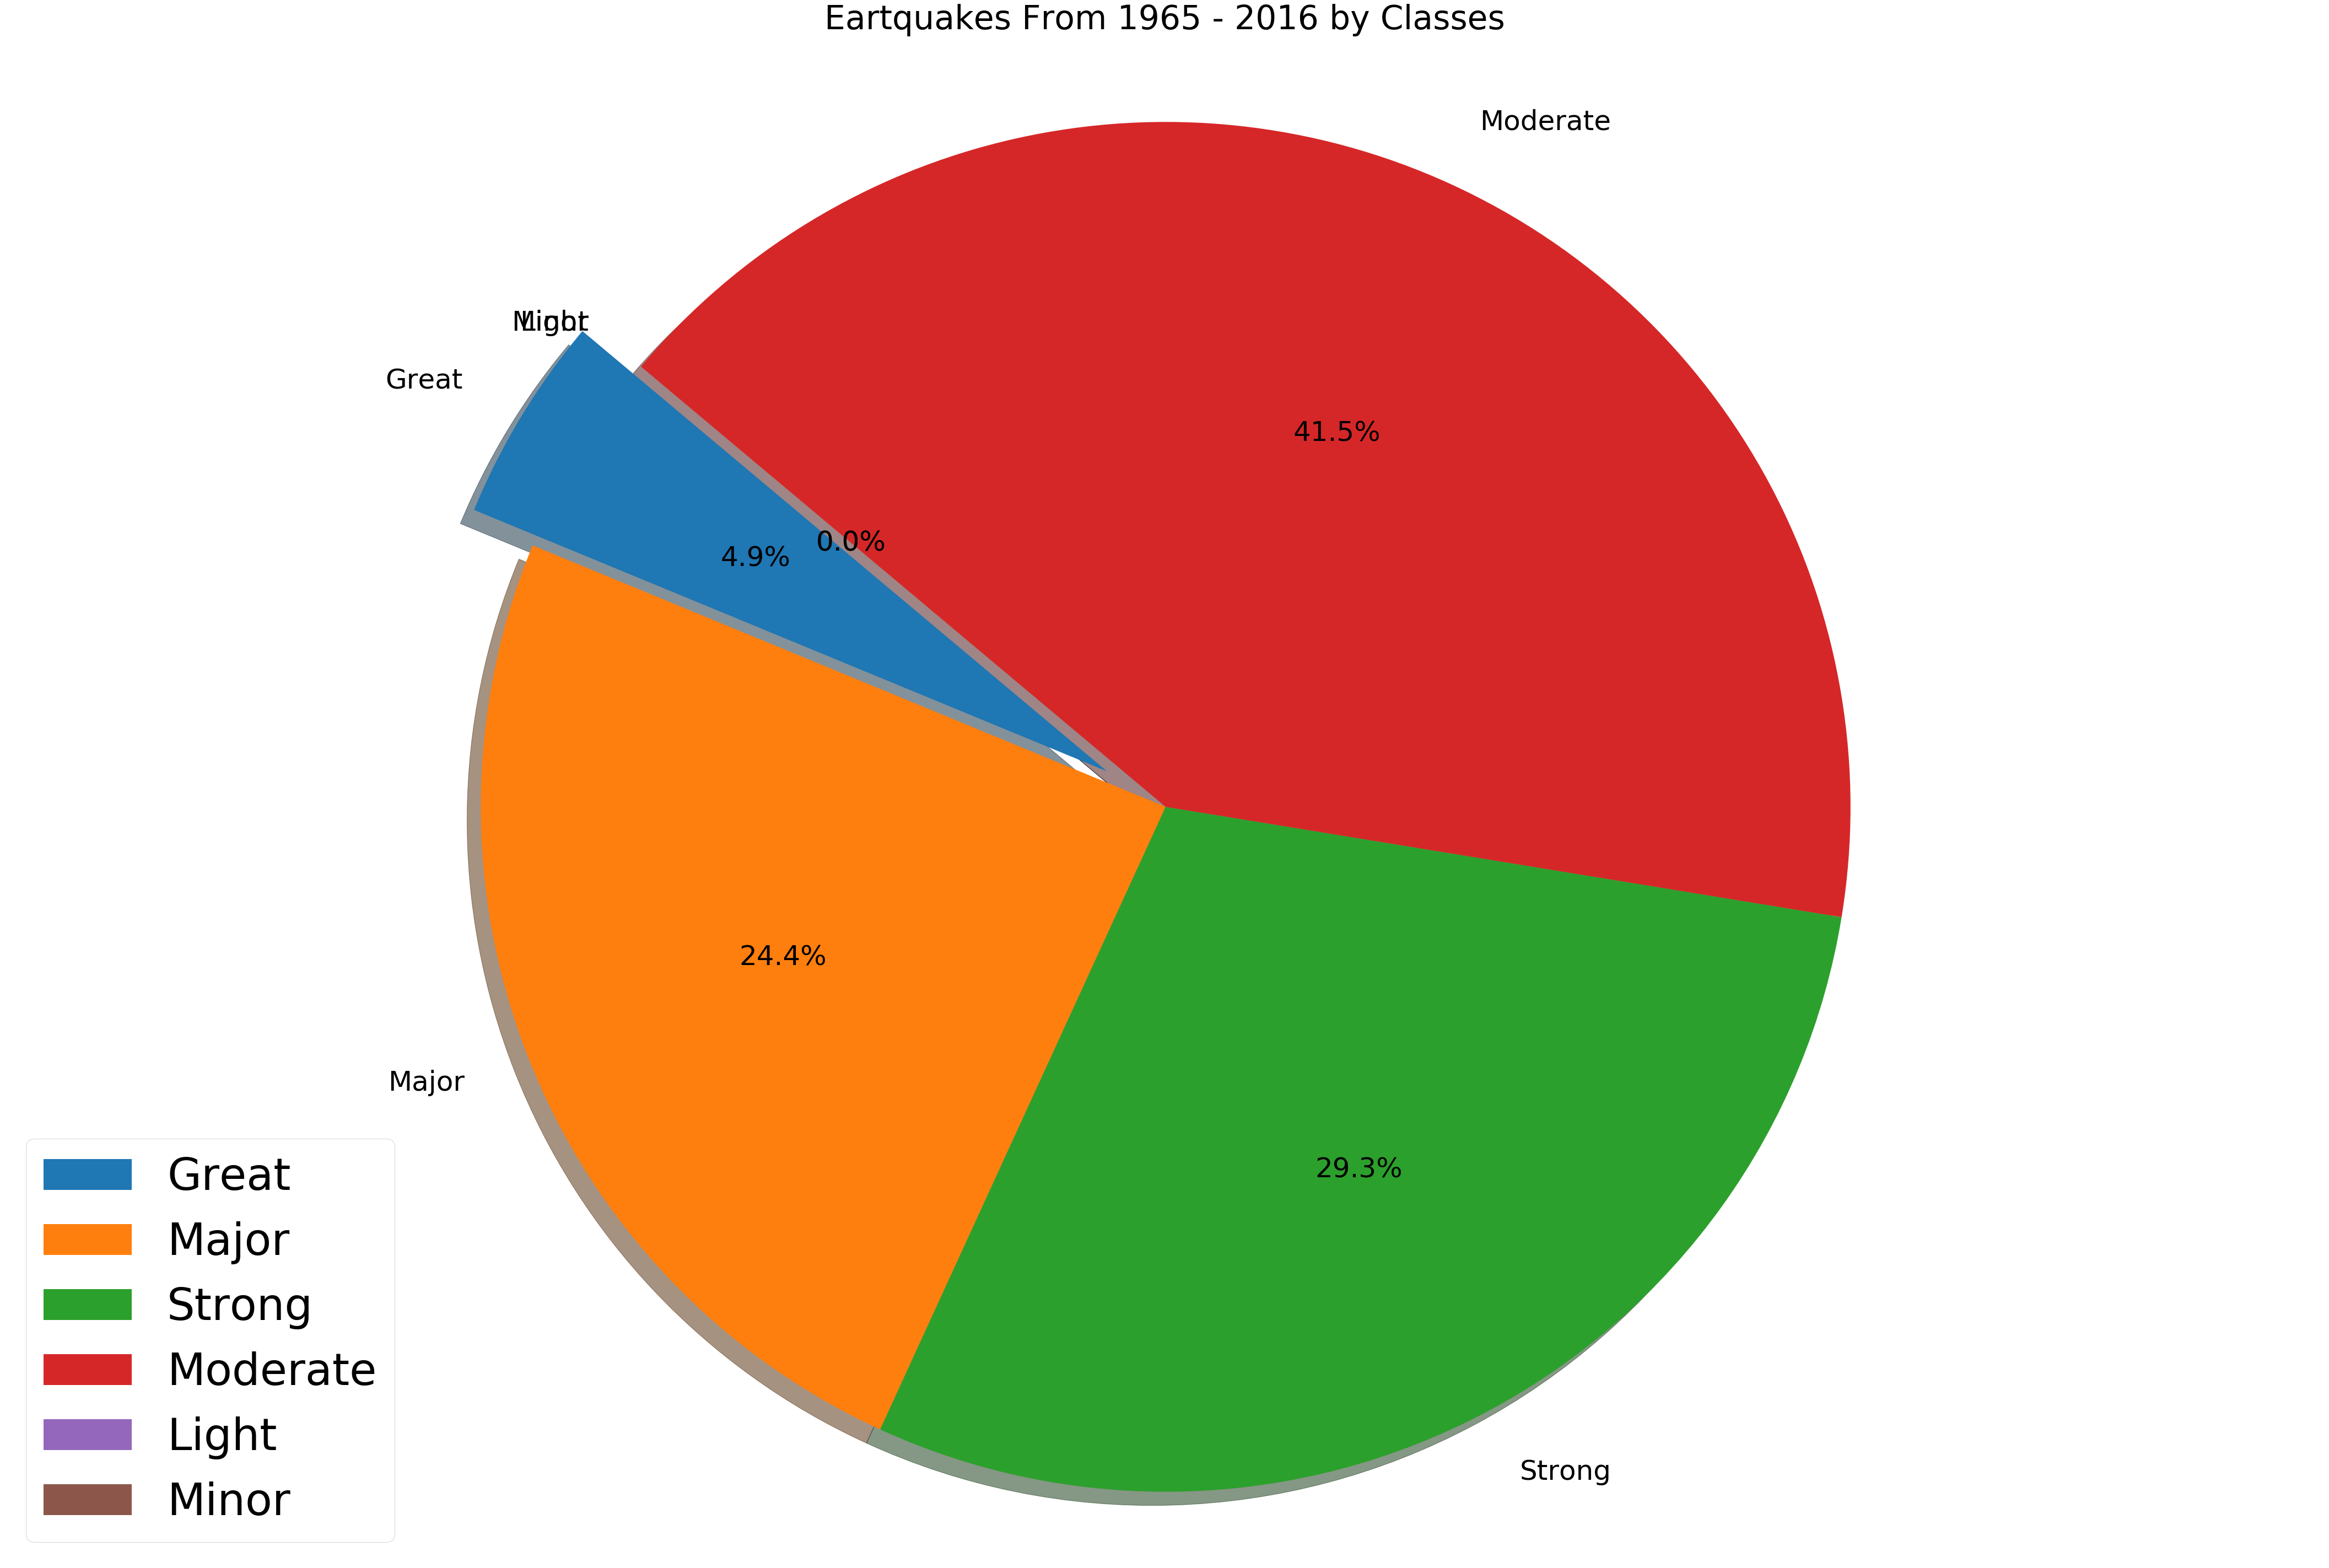

In [33]:
Great=0
Major=0
Strong=0
Moderate=0
Light=0
Minor=0

for key, value in uniqueDataByMagnitude.items() :
    key = int(key)
    if key>=8:
        Great+=1
    elif key >=7 and key <8:
        Major+=1
    elif key >=6 and key <7:
        Strong+=1
    elif key >=5 and key <6:
        Moderate+=1
    elif key >=4 and key <5:
        Light+=1
    elif key >=3 and key <4:
        Minor+=1


'''        
# Plotting Pie graph
'''
# Data to plot
#plt.subplot(211)
plt.figure(figsize=(60, 40))
plt.rcParams['font.size'] = 50.0
labels = ['Great', 'Major', 'Strong', 'Moderate', 'Light', 'Minor']
sizes = [Great, Major, Strong, Moderate, Light, Minor]
colors = ['red ', 'orange', 'brown', 'yellow', 'purple' ,'blue' ]
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels,loc=3, prop={'size': 80})
plt.axis('equal')
plt.tight_layout()
plt.title('Eartquakes From 1965 - 2016 by Classes')

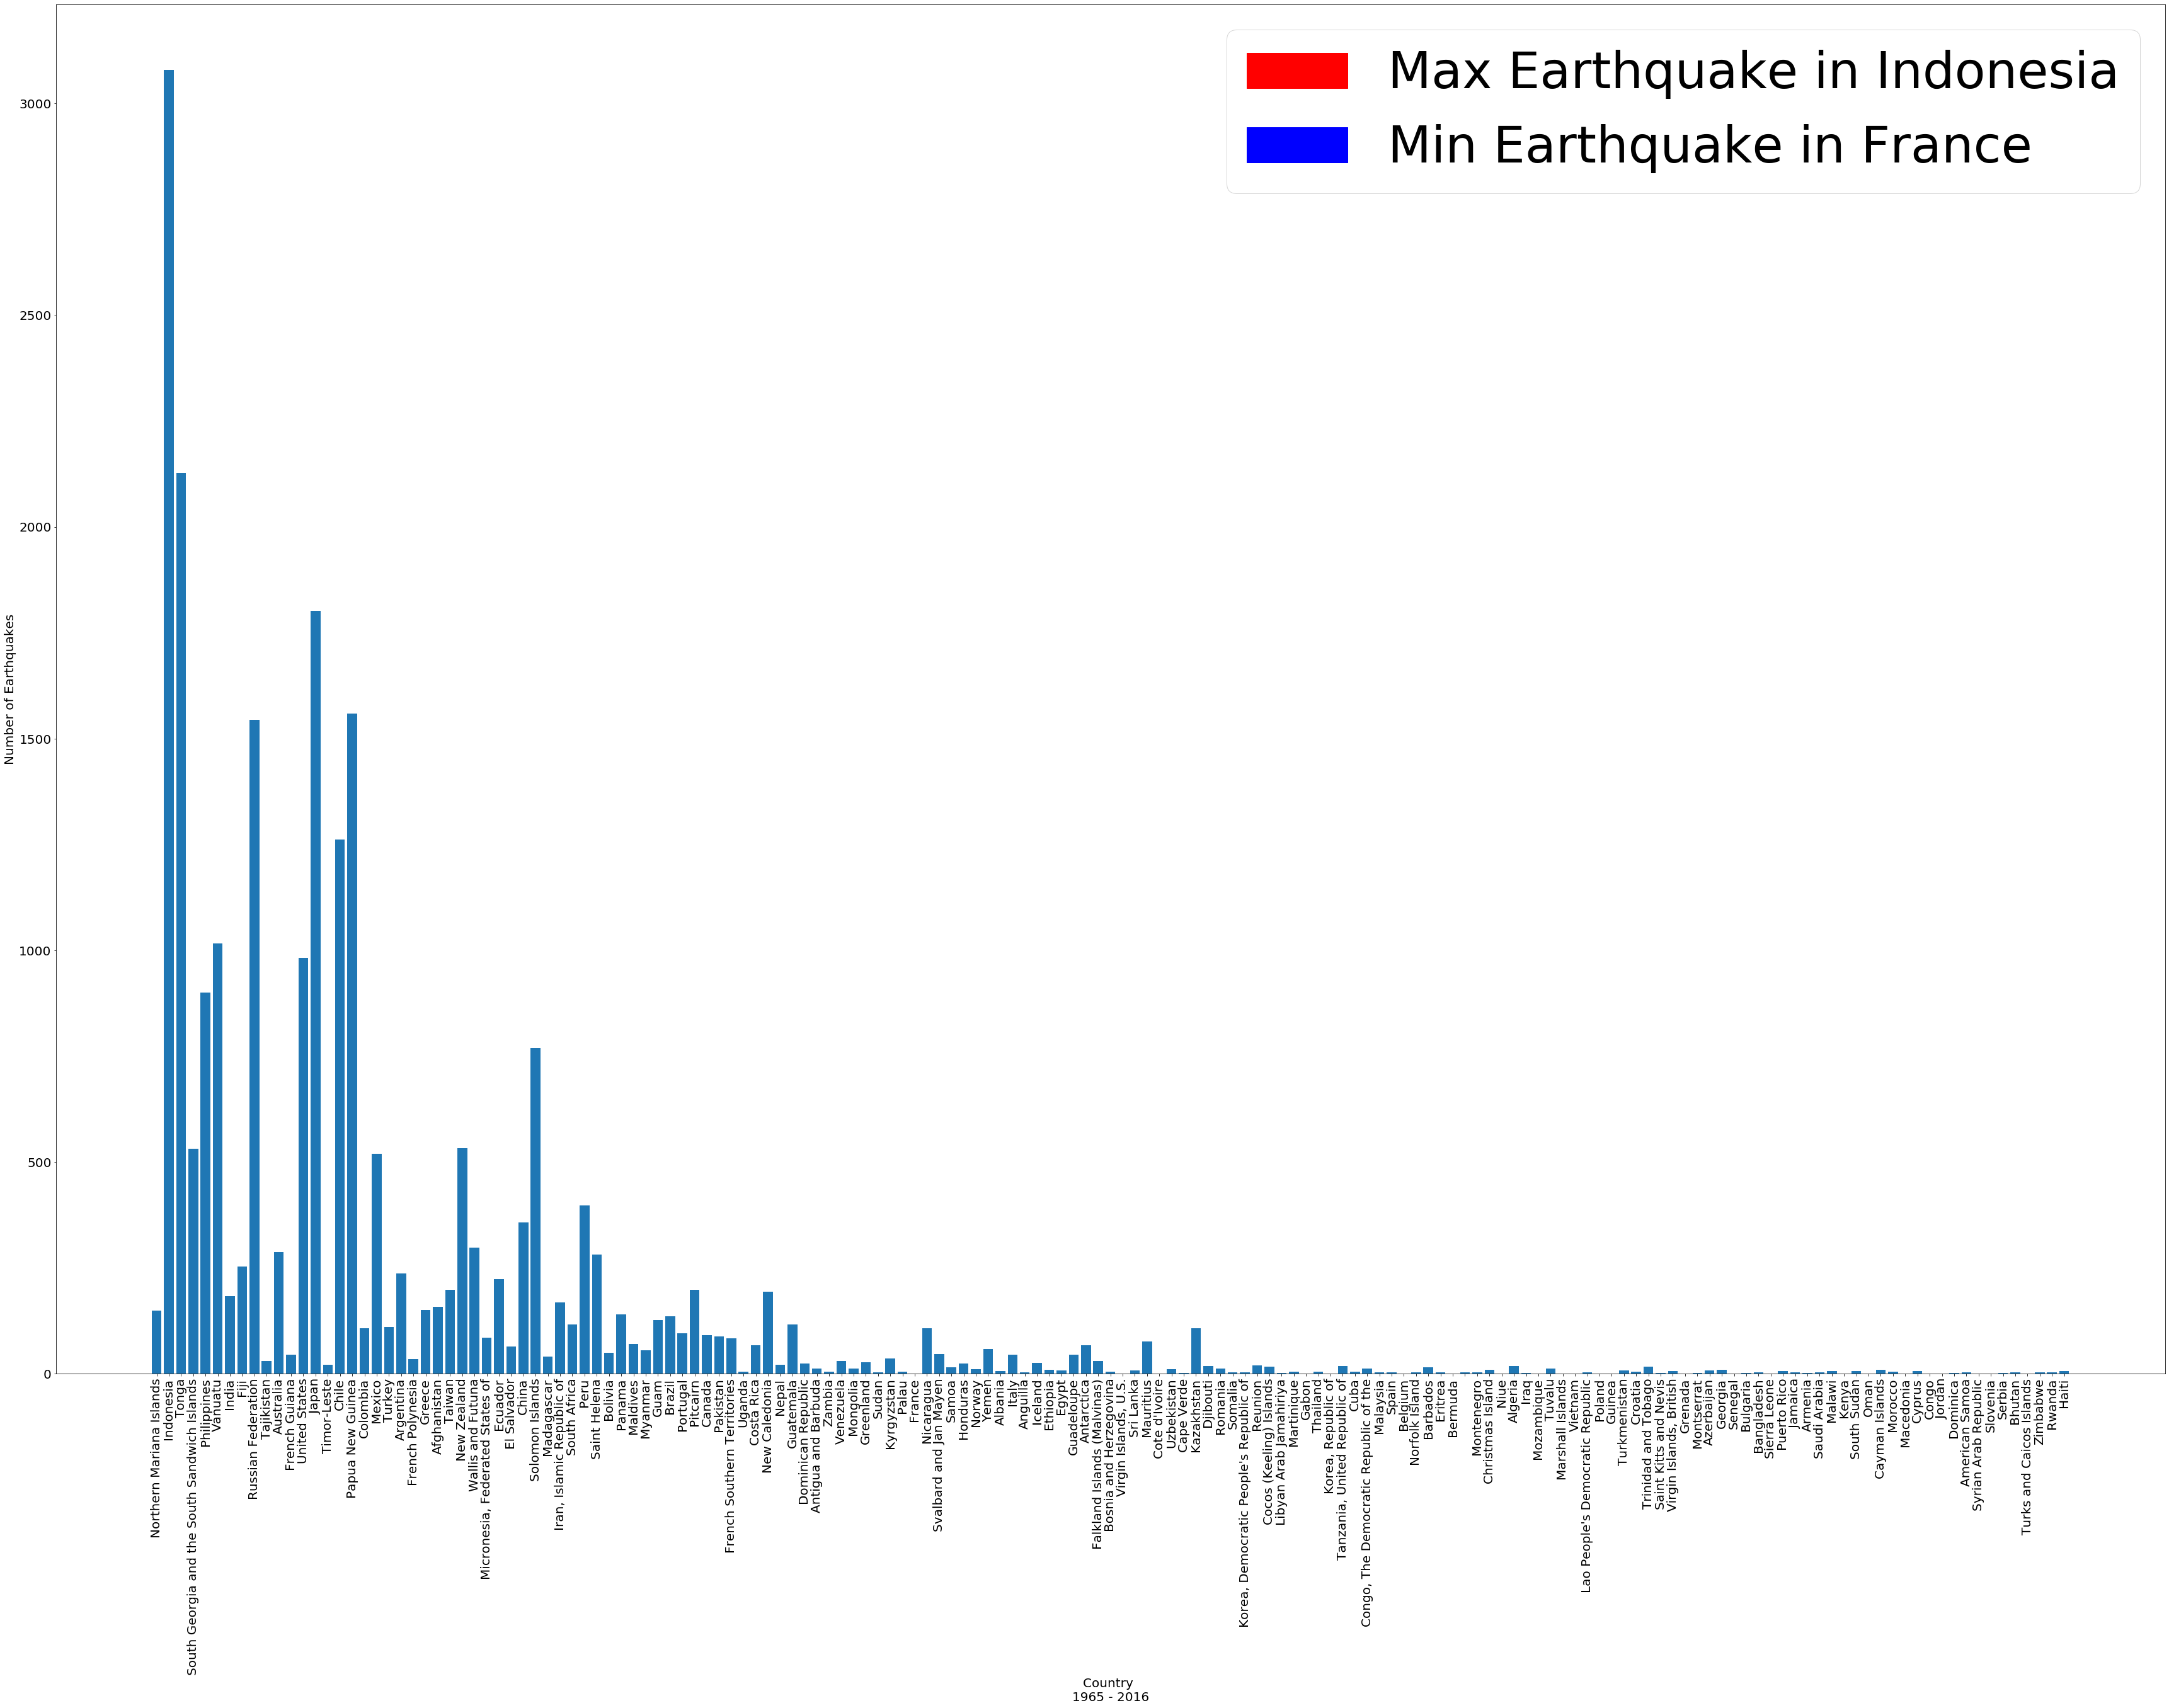

In [35]:
'''        
# Plotting bar graph
'''
#plt.subplot(212)
plt.rcParams.update({'font.size': 20})
plt.rcParams['font.size'] = 20.0
plt.figure(figsize=(60, 40))
uniqueData  = collections.Counter(e['country'] for e in datas)

max_eq = max(uniqueData, key=uniqueData.get)
min_eq = min(uniqueData, key=uniqueData.get)

plt.bar(range(len(uniqueData)), list(uniqueData.values()), align='center')
plt.xticks(range(len(uniqueData)), list(uniqueData.keys()), rotation=90)
plt.xlabel('Country \n1965 - 2016')
plt.ylabel('Number of Earthquakes')

red_patch = mpatches.Patch(color='red', label='Max Earthquake in '+max_eq)
blue_patch = mpatches.Patch(color='blue', label='Min Earthquake in '+min_eq)

plt.legend(handles=[red_patch, blue_patch], prop={'size': 80})

plt.show()